# Player Game Stats Exploratory Data Analysis

## Importing and Describing Data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

df = pd.read_csv('player_game_stats_data_2022_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260772 entries, 0 to 260771
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   game_id       260772 non-null  int64 
 1   school        260772 non-null  object
 2   conference    260772 non-null  object
 3   homeAway      260772 non-null  object
 4   points        260772 non-null  int64 
 5   category      260772 non-null  object
 6   sub_category  260772 non-null  object
 7   athlete_id    260772 non-null  int64 
 8   athlete_name  260772 non-null  object
 9   stat          260772 non-null  object
dtypes: int64(3), object(7)
memory usage: 19.9+ MB


## Creating Dataframes for Individual Categories

The purpose of this section is to create dataframes for each individual category within the player_game_stats dataset

In [3]:
df['category'].unique()

array(['punting', 'kicking', 'puntReturns', 'kickReturns',
       'interceptions', 'defensive', 'receiving', 'rushing', 'passing',
       'fumbles'], dtype=object)

In [38]:
# Creating individual dataframes for each category

punting_df = df[df['category'] == 'punting']
kicking_df = df[df['category'] == 'kicking']
puntReturns_df = df[df['category'] == 'puntReturns']
interceptions_df = df[df['category'] == 'interceptions']
defensive_df = df[df['category'] == 'defensive']
receiving_df = df[df['category'] == 'receiving']
rushing_df = df[df['category'] == 'rushing']
passing_df = df[df['category'] == 'passing']
fumbles_df = df[df['category'] == 'fumbles']

# Exploring Passing Data

In [5]:
passing_df.head()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
100,401442019,Tennessee,SEC,away,31,passing,INT,4360698,Joe Milton,0
101,401442019,Tennessee,SEC,away,31,passing,TD,4360698,Joe Milton,3
102,401442019,Tennessee,SEC,away,31,passing,AVG,4360698,Joe Milton,9.0
103,401442019,Tennessee,SEC,away,31,passing,YDS,4360698,Joe Milton,251
104,401442019,Tennessee,SEC,away,31,passing,C/ATT,4360698,Joe Milton,19/28


In [6]:
passing_df['sub_category'].unique()

array(['INT', 'TD', 'AVG', 'YDS', 'C/ATT', 'QBR'], dtype=object)

## Exploring Passing Yards Data

In [7]:
pass_yards = passing_df[passing_df['sub_category'] == 'YDS']
pass_yards.head()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
103,401442019,Tennessee,SEC,away,31,passing,YDS,4360698,Joe Milton,251
223,401442019,Clemson,ACC,home,14,passing,YDS,4426553,Davis Allen,0
224,401442019,Clemson,ACC,home,14,passing,YDS,-5650,Team,0
225,401442019,Clemson,ACC,home,14,passing,YDS,4685413,Cade Klubnik,320
395,401443542,Pittsburgh,ACC,away,37,passing,YDS,-7111,Team,0


In [8]:
# Converting stat to int
pass_yards['stat'] = pass_yards['stat'].astype(int)

/var/folders/cf/z7p1twyn1lv45thqhc6_by5r0000gn/T/ipykernel_54357/3247102004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_yards['stat'] = pass_yards['stat'].astype(int)


In [9]:
# Top 20 QBs by avg YPG
pass_yards.groupby(["athlete_name", "school"]).agg({'points': 'mean', 'stat': 'mean'}).sort_values(by = 'stat', ascending = False).head(20)

,,points,stat
athlete_name,school,,
Kyle Vantrease,Georgia Southern,45.000000,409.000000
Chase Cunningham,Middle Tennessee,45.000000,408.000000
Tanner Mordecai,SMU,30.500000,370.500000
Jason Shelley,Missouri State,27.000000,357.000000
Michael Penix Jr.,Washington,38.800000,355.000000
Ben Bryant,Cincinnati,34.500000,339.500000
Matt McKay,Elon,31.000000,333.000000
Daniel Richardson,Central Michigan,29.000000,329.500000
Caleb Williams,USC,41.357143,323.928571


## Exploring QBR Data

In [39]:
qbr = passing_df[passing_df['sub_category'] == 'QBR']
qbr.head()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
2475,401411101,Clemson,ACC,away,41,passing,QBR,4685413,Cade Klubnik,94.6
2476,401411101,Clemson,ACC,away,41,passing,QBR,4429020,D.J. Uiagalelei,37.5
2722,401411101,Georgia Tech,ACC,home,10,passing,QBR,4429066,Jeff Sims,62.8
2949,401411099,Louisville,ACC,away,7,passing,QBR,4686343,Braden Smith,100.0
2950,401411099,Louisville,ACC,away,7,passing,QBR,4240069,Malik Cunningham,25.6


In [11]:
qbr.sort_values(by= 'stat',ascending=False)

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
176630,401403882,Penn State,Big Ten,away,41,passing,QBR,4714771,Drew Allar,99.9
60934,401403966,TCU,Big 12,away,38,passing,QBR,4427105,Max Duggan,99.9
115433,401404149,Michigan,Big Ten,home,59,passing,QBR,4362159,Alan Bowman,99.9
118342,401405085,New Mexico State,FBS Independents,away,7,passing,QBR,4427125,Weston Eget,99.9
101471,401405067,Michigan,Big Ten,home,51,passing,QBR,4433970,J.J. McCarthy,99.9
...,...,...,...,...,...,...,...,...,...,...
36099,401411137,North Carolina,ACC,away,38,passing,QBR,-7741,Team,--
118909,401405083,Southern Illinois,MVFC,away,31,passing,QBR,4572712,Zach Zebrowski,--
61762,401404052,Tennessee Tech,OVC,away,10,passing,QBR,4249033,Jeremiah Oatsvall,--
12347,401411104,Western Carolina,Southern,away,17,passing,QBR,5089540,Cole Gonzales,--


In [12]:
# Removing dirty data
qbr_dirty =  qbr[qbr['stat'] == '--'].index
qbr.drop(qbr_dirty, inplace = True)
qbr[qbr['stat'] == '--']

/var/folders/cf/z7p1twyn1lv45thqhc6_by5r0000gn/T/ipykernel_54357/2632320512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbr.drop(qbr_dirty, inplace = True)


,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat


In [13]:
# Converting stat to float
qbr['stat'] = qbr['stat'].astype(float)

/var/folders/cf/z7p1twyn1lv45thqhc6_by5r0000gn/T/ipykernel_54357/404559171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbr['stat'] = qbr['stat'].astype(float)


In [14]:
# Top 20 QBs by avg QBR
qbr.groupby(["athlete_name", "school"]).agg({'points': 'mean', 'stat': 'mean'}).sort_values(by = 'stat', ascending = False).head(20)

,,points,stat
athlete_name,school,,
Jordyn Tyson,Colorado,20.0,100.0
Chase Roberts,BYU,26.0,100.0
Brayden Willis,Oklahoma,49.0,100.0
Kai Kroeger,South Carolina,17.0,100.0
Donaven McCulley,Indiana,33.0,100.0
Josh Smith,Kent State,22.0,100.0
Xavier Worthy,Texas,38.0,100.0
Dontae Smith,Georgia Tech,14.0,100.0
Tyjon Lindsey,Oregon State,16.0,100.0


<AxesSubplot:>

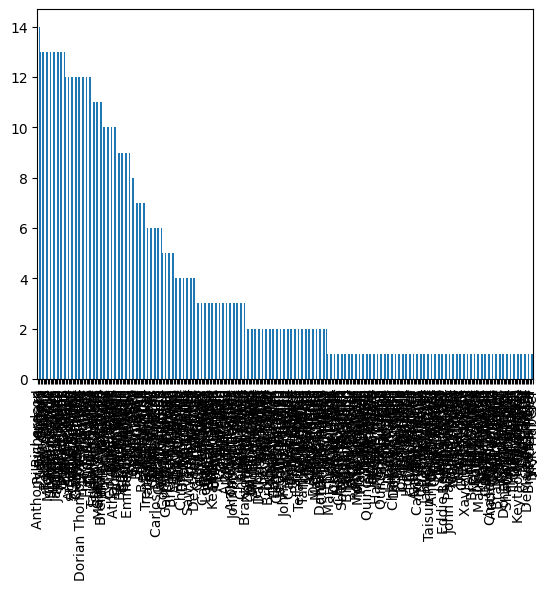

In [15]:
fig, ax = plt.subplots()
qbr['athlete_name'].value_counts().plot(ax=ax, kind='bar')

In [22]:
qbr.groupby('athlete_name').filter(lambda x: len(x) == 6)[['athlete_name', 'stat']]

,athlete_name,stat
2475,Cade Klubnik,94.6
3176,Carlos Del Rio-Wilson,8.4
8747,Tate Rodemaker,2.1
9818,Carlos Del Rio-Wilson,55.4
10647,Cade Klubnik,0.5
...,...,...
250625,Ty Thompson,0.5
251296,Ty Thompson,3.1
252257,Trenton Bourguet,0.4
255608,Trenton Bourguet,47.2


In [28]:
# Top 20 QBs by avg QBR
grouped = qbr.groupby(["athlete_name", "school"]).agg({'points': 'mean', 'stat': 'mean'}).sort_values(by = 'stat', ascending = False)
grouped

,,points,stat
athlete_name,school,,
Jordyn Tyson,Colorado,20.0,100.0
Chase Roberts,BYU,26.0,100.0
Brayden Willis,Oklahoma,49.0,100.0
Kai Kroeger,South Carolina,17.0,100.0
Donaven McCulley,Indiana,33.0,100.0
...,...,...,...
Bryce Baringer,Michigan State,34.0,0.0
Chase Brown,Illinois,20.0,0.0
Jared Wayne,Pittsburgh,19.0,0.0


In [33]:
qbr.groupby(['athlete_name', 'school']).agg({'stat': 'mean'})

,,stat
athlete_name,school,
A.J. Duffy,Florida State,16.866667
AJ Mayer,Arkansas State,7.100000
AJ Swann,Vanderbilt,52.350000
Adrian Martinez,Kansas State,58.360000
Aidan O'Connell,Purdue,68.366667
...,...,...
Xavier Worthy,Texas,100.000000
Zach Gibson,Georgia Tech,36.614286
Zach Pyron,Georgia Tech,48.433333


In [44]:
qbr.value_counts()

game_id    school            conference      homeAway  points  category  sub_category  athlete_id  athlete_name     stat
401403890  Miami             ACC             away      9       passing   QBR           4685186     Tyler Van Dyke   57.3    2
401403882  Auburn            SEC             home      12      passing   QBR           4431948     TJ Finley        59.9    2
401403966  TCU               Big 12          away      38      passing   QBR           4427105     Max Duggan       99.9    2
                                                                                       4692530     Chandler Morris  61.4    2
401403886  Ole Miss          SEC             away      42      passing   QBR           4689114     Jaxson Dart      77.1    2
                                                                                                                           ..
401404027  Arizona           Pac-12          away      20      passing   QBR           4801717     Noah Fifita      95.2   

In [43]:
qbr[qbr['game_id'] == 401403958]

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
54127,401403958,Florida State,ACC,home,45,passing,QBR,4360799,Jordan Travis,87.5
54337,401403958,Florida,SEC,away,38,passing,QBR,4429084,Anthony Richardson,60.9
209345,401403958,Florida State,ACC,home,45,passing,QBR,4360799,Jordan Travis,87.5
209555,401403958,Florida,SEC,away,38,passing,QBR,4429084,Anthony Richardson,60.9


In [42]:
df.drop_duplicates()

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
0,401442019,Tennessee,SEC,away,31,punting,LONG,4369847,Paxton Brooks,48
1,401442019,Tennessee,SEC,away,31,punting,In 20,4369847,Paxton Brooks,1
2,401442019,Tennessee,SEC,away,31,punting,TB,4369847,Paxton Brooks,0
3,401442019,Tennessee,SEC,away,31,punting,AVG,4369847,Paxton Brooks,39.6
4,401442019,Tennessee,SEC,away,31,punting,YDS,4369847,Paxton Brooks,317
...,...,...,...,...,...,...,...,...,...,...
260767,401437035,USC,Pac-12,home,24,passing,INT,4431611,Caleb Williams,1
260768,401437035,USC,Pac-12,home,24,passing,TD,4431611,Caleb Williams,3
260769,401437035,USC,Pac-12,home,24,passing,AVG,4431611,Caleb Williams,8.9
260770,401437035,USC,Pac-12,home,24,passing,YDS,4431611,Caleb Williams,363


In [47]:
df[(df['game_id'] == 401403958) & (df['sub_category'] == 'QBR')]

,game_id,school,conference,homeAway,points,category,sub_category,athlete_id,athlete_name,stat
54127,401403958,Florida State,ACC,home,45,passing,QBR,4360799,Jordan Travis,87.5
54337,401403958,Florida,SEC,away,38,passing,QBR,4429084,Anthony Richardson,60.9
209345,401403958,Florida State,ACC,home,45,passing,QBR,4360799,Jordan Travis,87.5
209555,401403958,Florida,SEC,away,38,passing,QBR,4429084,Anthony Richardson,60.9


In [49]:
df.value_counts()

game_id    school        conference  homeAway  points  category   sub_category  athlete_id  athlete_name     stat
401470891  Oregon        Pac-12      away      28      rushing    YDS            4685397    Jordan James     27      2
401405073  Northwestern  Big Ten     home      23      defensive  TOT            4432436    Xander Mueller   7       2
                                                       fumbles    LOST           4569609    Evan Hull        1       2
                                                                                 4426657    Ryan Hilinski    1       2
                                                                  FUM            4569609    Evan Hull        1       2
                                                                                                                    ..
401404029  USC           Pac-12      home      41      defensive  TOT            5085025    Kyron Hudson     1       1
                                                     

In [ ]:
# Need to remove duplicates... Not sure why they exists